# ANDREW JANZEN
# COURSE 5 TASK 2
# EDA - CREDIT ONE ANALYSIS

This task was my most in-depth use of Python to date. This document contains a lot of attempts... only to realize there was a better way. I left the code to document the discover process.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
credit = pd.read_csv('default_transformed.csv', header =1)

Added additional columns prior to import: 
* BILL_PCT_1-6: Bill percent of credit limit by month
* PAY_6MO_PCT_LIM: Sum of payments over last 6 months as percent of credit limit
* BILL1_PCT_LIM: To indicate the size of default (are they just a little behind or does this represent a large potential loss?) Calculated by BILL_AMT1/LIMIT_BAL.

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,default payment next month,BILL_PCT_1,BILL_PCT_2,BILL_PCT_3,BILL_PCT_4,BILL_PCT_5,BILL_PCT_6,PAY_6MO_PCT_LIM,LIMIT_PER_AGE,BILL1_PCT_LIM
0,1,20000,2,2,1,24,2,2,-1,-1,...,1,0.20,0.16,0.03,0.00,0.00,0.00,0.03,833,0.20
1,2,120000,2,2,2,26,-1,2,0,0,...,1,0.02,0.01,0.02,0.03,0.03,0.03,0.04,4615,0.02
2,3,90000,2,2,2,34,0,0,0,0,...,0,0.32,0.16,0.15,0.16,0.17,0.17,0.12,2647,0.32
3,4,50000,2,2,1,37,0,0,0,0,...,0,0.94,0.96,0.99,0.57,0.58,0.59,0.17,1351,0.94
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,0.17,0.11,0.72,0.42,0.38,0.38,1.18,877,0.17


In [7]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,default payment next month,BILL_PCT_1,BILL_PCT_2,BILL_PCT_3,BILL_PCT_4,BILL_PCT_5,BILL_PCT_6,PAY_6MO_PCT_LIM,LIMIT_PER_AGE,BILL1_PCT_LIM
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,0.221200,0.423713,0.411062,0.392109,0.359460,0.333073,0.318532,0.233523,4829.608167,0.423713
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,0.415062,0.411550,0.404623,0.396511,0.368781,0.350633,0.345396,0.315803,3712.581168,0.411550
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,-0.620000,-1.400000,-1.030000,-1.370000,-0.880000,-1.510000,0.000000,161.000000,-0.620000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.020000,0.020000,0.020000,0.010000,0.010000,0.010000,0.070000,1818.000000,0.020000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.310000,0.300000,0.270000,0.240000,0.210000,0.190000,0.160000,4000.000000,0.310000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.830000,0.810000,0.760000,0.670000,0.600000,0.580000,0.260000,6897.000000,0.830000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,6.460000,6.380000,10.690000,5.150000,4.940000,3.890000,14.570000,26786.000000,6.460000


Initial Observations:
* Average credit: #$167k# (50% mark - $140k)
* More women in dataset than men
* Average age of clients - 35; with 75% under 41 (skewed left)

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
credit[pd.notnull(credit.EDUCATION)!=True]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,default payment next month,BILL_PCT_1,BILL_PCT_2,BILL_PCT_3,BILL_PCT_4,BILL_PCT_5,BILL_PCT_6,PAY_6MO_PCT_LIM,LIMIT_PER_AGE,BILL1_PCT_LIM


ANALYSIS
* No null values in dataset

In [10]:
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
def ED_RECODE(series):
    if series == 1:
        return "GRAD"
    elif series == 2:
        return "UNIV"
    elif series == 3:
        return "HS"
    elif series > 3:
        return "OTHR"
    elif series == 0:
        return "OTHR"

In [12]:
credit['EDU_BUCK'] = credit['EDUCATION'].apply(ED_RECODE)

In [13]:
credit['EDU_BUCK'].value_counts()

UNIV    14030
GRAD    10585
HS       4917
OTHR      468
Name: EDU_BUCK, dtype: int64

### ANALYSIS - Most customers have University or Graduate degree

In [14]:
def GEN_RECODE(series):
    if series == 1:
        return "MALE"
    elif series == 2:
        return "FEML"

In [15]:
credit['SEX_BUCK'] = credit['SEX'].apply(GEN_RECODE)

In [16]:
credit.SEX_BUCK.value_counts()

FEML    18112
MALE    11888
Name: SEX_BUCK, dtype: int64

### ANALYSIS - More customers are female than male.

In [17]:
def MAR_RECODE(series):
    if series == 1:
        return "MARR"
    elif series == 2:
        return "SING"
    elif series == 3:
        return "DIV"
    elif series == 0:
        return "OTHR"

In [18]:
credit['MAR_BUCK'] = credit['MARRIAGE'].apply(MAR_RECODE)

In [19]:
credit['MAR_BUCK'].value_counts()

SING    15964
MARR    13659
DIV       323
OTHR       54
Name: MAR_BUCK, dtype: int64

### ANALYSIS - More customers are single, followed by married.

In [20]:
def DEFAULT(series):
    if series == 0:
        return "PAID"
    elif series == 1:
        return "DEFAULT"

In [21]:
credit['def_word'] = credit['default payment next month'].apply(DEFAULT)

In [22]:
credit.def_word.value_counts()

PAID       23364
DEFAULT     6636
Name: def_word, dtype: int64

### ANALYSIS - within the dataset, most customers pay. The overall default rate is 22%.

In [23]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_PCT_4,BILL_PCT_5,BILL_PCT_6,PAY_6MO_PCT_LIM,LIMIT_PER_AGE,BILL1_PCT_LIM,EDU_BUCK,SEX_BUCK,MAR_BUCK,def_word
0,1,20000,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.03,833,0.20,UNIV,FEML,MARR,DEFAULT
1,2,120000,2,2,2,26,-1,2,0,0,...,0.03,0.03,0.03,0.04,4615,0.02,UNIV,FEML,SING,DEFAULT
2,3,90000,2,2,2,34,0,0,0,0,...,0.16,0.17,0.17,0.12,2647,0.32,UNIV,FEML,SING,PAID
3,4,50000,2,2,1,37,0,0,0,0,...,0.57,0.58,0.59,0.17,1351,0.94,UNIV,FEML,MARR,PAID
4,5,50000,1,2,1,57,-1,0,-1,0,...,0.42,0.38,0.38,1.18,877,0.17,UNIV,MALE,MARR,PAID


In [24]:
credit['ID'] = credit['ID'].astype('object')
credit['BILL_PCT_1']= credit['BILL_PCT_1'].astype('float')
credit['BILL_PCT_2']= credit['BILL_PCT_2'].astype('float')  
credit['BILL_PCT_3']= credit['BILL_PCT_3'].astype('float')
credit['BILL_PCT_4']= credit['BILL_PCT_4'].astype('float')
credit['BILL_PCT_5']= credit['BILL_PCT_5'].astype('float')
credit['BILL_PCT_6']= credit['BILL_PCT_6'].astype('float')
credit['PAY_6MO_PCT_LIM']= credit['PAY_6MO_PCT_LIM'].astype('float')
credit['BILL1_PCT_LIM']= credit['BILL1_PCT_LIM'].astype('float')
credit['LIMIT_PER_AGE']= credit['LIMIT_PER_AGE'].astype('float')

In [25]:
def AGE_RECODE(series):
    if series < 25 :
        return "<25"
    elif series < 30:
        return "<30"
    elif series < 35:
        return "<35"
    elif series <40:
        return "<40"
    elif series < 50:
        return "<50"
    elif series >=50:
        return "50+"

In [26]:
credit['AGE_BUCK'] = credit['AGE'].apply(AGE_RECODE)

In [27]:
credit.AGE_BUCK.value_counts()

<30    6933
<50    6464
<35    6078
<40    5160
<25    2685
50+    2680
Name: AGE_BUCK, dtype: int64

### Bucketed into age groups of ~5-6k. Further analysis is below.

In [28]:
def BAL_BUCKET(series):
    if series < 50000:
        return "<50K"
    elif series < 100000:
        return "<100K"
    elif series < 200000:
        return "<200K"
    elif series < 300000:
        return "<300K"
    elif series >= 300000:
        return "300K+"
    
    #DISCRETATION POV FOR CREDIT AVAILABLE: <50K, <100K, <200K, >=200K

In [29]:
credit['LIMIT_BAL_BUCK'] = credit['LIMIT_BAL'].apply(BAL_BUCKET)

In [30]:
credit.LIMIT_BAL_BUCK.value_counts()

<200K    7400
<100K    7139
<300K    6033
300K+    5117
<50K     4311
Name: LIMIT_BAL_BUCK, dtype: int64

### Bucketed into Credit Limit groups of ~6-7k customers. Further analysis is below.

In [31]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6              

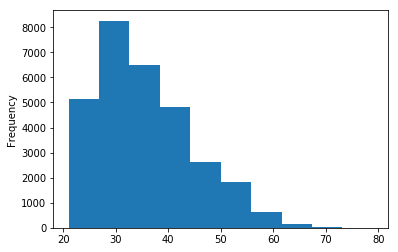

In [32]:
credit['AGE'].plot.hist()

In [33]:
credit_freq = credit['LIMIT_BAL'].value_counts()

In [34]:
credit_freq.columns = ["AMT","FREQ"]

## ? HOW TO ADD COLUMN HEADERS ?

In [35]:
credit_freq.describe()

count      81.000000
mean      370.370370
std       549.650263
min         1.000000
25%         8.000000
50%       161.000000
75%       588.000000
max      3365.000000
Name: LIMIT_BAL, dtype: float64

In [36]:
credit_freq.sort_index()

10000       493
16000         2
20000      1976
30000      1610
40000       230
50000      3365
60000       825
70000       731
80000      1567
90000       651
100000     1048
110000      588
120000      726
130000      729
140000      749
150000     1110
160000      694
170000      532
180000      995
190000      229
200000     1528
210000      730
220000      469
230000      737
240000      619
250000      350
260000      521
270000      238
280000      493
290000      348
           ... 
500000      722
510000       19
520000       20
530000       10
540000        6
550000       21
560000       10
570000        8
580000       11
590000        6
600000       16
610000       11
620000        9
630000        7
640000        7
650000        3
660000        3
670000        3
680000        4
690000        1
700000        8
710000        6
720000        3
730000        2
740000        2
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length:

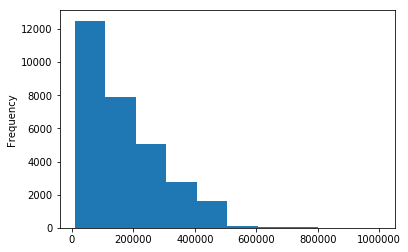

In [37]:
credit['LIMIT_BAL'].plot.hist()

# Data Prep Assessment
### Data cleaning
    * Data is clean
### Data transformation
    * No missing values in the dataset
    * Some calculations applied for feature engineering (see note at data import step)
### Data reduction
    * No reduction required
### Data discretization
    * Credit limit 
    * Age
    * Somewhat summarized Marriage and Education attributes
### Text cleaning
    * No text cleaning is required

In [38]:
credit.to_csv('prepped_credit_file.csv',header = 1)
cr = credit

In [39]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6              

# VISUALIZATION

## SAMPLE PLOTS

In [40]:
header = cr.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK'],
      dtype='object')


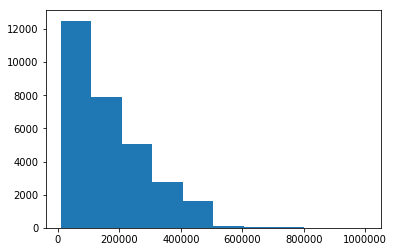

In [41]:
plt.hist(cr['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

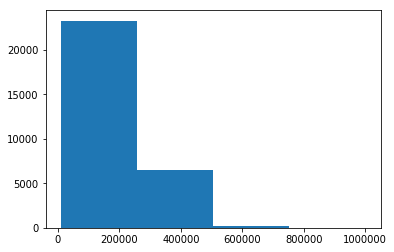

In [42]:
plt.hist(cr['LIMIT_BAL'], bins=4)

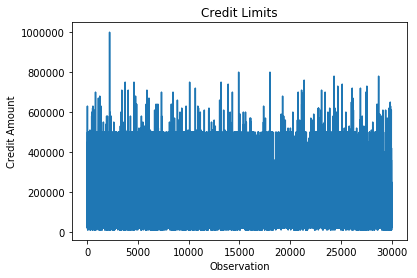

In [43]:
plt.plot(cr['LIMIT_BAL'])
plt.title("Credit Limits")
plt.xlabel("Observation")
plt.ylabel("Credit Amount")
plt.show()

In [44]:
x = cr['PAY_1']
y = cr['PAY_2']

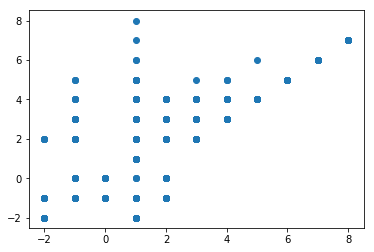

In [45]:
plt.scatter(x,y)
plt.show()

In [46]:
header = cr.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK'],
      dtype='object')


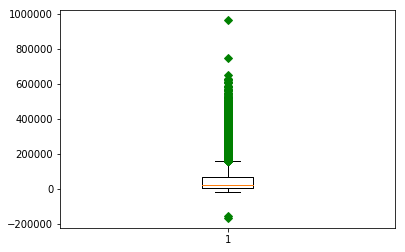

In [47]:
A = cr['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

## Correlation

In [48]:
corrMat = cr.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_1                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

[Text(0.5, 0, 'LIMIT_BAL'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'EDUCATION'),
 Text(3.5, 0, 'MARRIAGE'),
 Text(4.5, 0, 'AGE'),
 Text(5.5, 0, 'PAY_1'),
 Text(6.5, 0, 'PAY_2'),
 Text(7.5, 0, 'PAY_3'),
 Text(8.5, 0, 'PAY_4'),
 Text(9.5, 0, 'PAY_5'),
 Text(10.5, 0, 'PAY_6'),
 Text(11.5, 0, 'BILL_AMT1'),
 Text(12.5, 0, 'BILL_AMT2'),
 Text(13.5, 0, 'BILL_AMT3'),
 Text(14.5, 0, 'BILL_AMT4'),
 Text(15.5, 0, 'BILL_AMT5'),
 Text(16.5, 0, 'BILL_AMT6'),
 Text(17.5, 0, 'PAY_AMT1'),
 Text(18.5, 0, 'PAY_AMT2'),
 Text(19.5, 0, 'PAY_AMT3'),
 Text(20.5, 0, 'PAY_AMT4'),
 Text(21.5, 0, 'PAY_AMT5'),
 Text(22.5, 0, 'PAY_AMT6'),
 Text(23.5, 0, 'default payment next month'),
 Text(24.5, 0, 'BILL_PCT_1'),
 Text(25.5, 0, 'BILL_PCT_2'),
 Text(26.5, 0, 'BILL_PCT_3'),
 Text(27.5, 0, 'BILL_PCT_4'),
 Text(28.5, 0, 'BILL_PCT_5'),
 Text(29.5, 0, 'BILL_PCT_6'),
 Text(30.5, 0, 'PAY_6MO_PCT_LIM'),
 Text(31.5, 0, 'LIMIT_PER_AGE'),
 Text(32.5, 0, 'BILL1_PCT_LIM')]

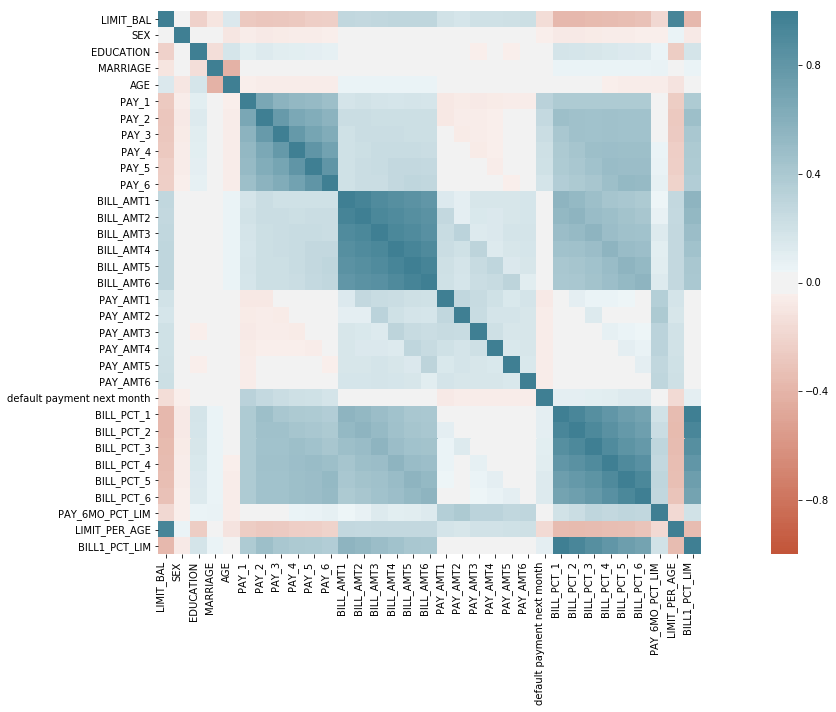

In [49]:
plt.figure(figsize = (25,10))

ax = sns.heatmap(
    corrMat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')
    

## Refined Correlation Matrix
### Fields Removed
* LIMIT_PER_AGE
* BILL_AMT2
* BILL_AMT4
* BILL_AMT3
* BILL_AMT6
* BILL_PCT_2
* BILL_PCT_4
* BILL_PCT_6
* BILL_PCT_3
* BILL1_PCT_LIM
* PAY_5

[Text(0.5, 0, 'LIMIT_BAL'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'EDUCATION'),
 Text(3.5, 0, 'MARRIAGE'),
 Text(4.5, 0, 'AGE'),
 Text(5.5, 0, 'PAY_1'),
 Text(6.5, 0, 'PAY_2'),
 Text(7.5, 0, 'PAY_3'),
 Text(8.5, 0, 'PAY_4'),
 Text(9.5, 0, 'PAY_6'),
 Text(10.5, 0, 'BILL_AMT1'),
 Text(11.5, 0, 'BILL_AMT5'),
 Text(12.5, 0, 'PAY_AMT1'),
 Text(13.5, 0, 'PAY_AMT2'),
 Text(14.5, 0, 'PAY_AMT3'),
 Text(15.5, 0, 'PAY_AMT4'),
 Text(16.5, 0, 'PAY_AMT5'),
 Text(17.5, 0, 'PAY_AMT6'),
 Text(18.5, 0, 'default payment next month'),
 Text(19.5, 0, 'BILL_PCT_1'),
 Text(20.5, 0, 'BILL_PCT_5'),
 Text(21.5, 0, 'PAY_6MO_PCT_LIM')]

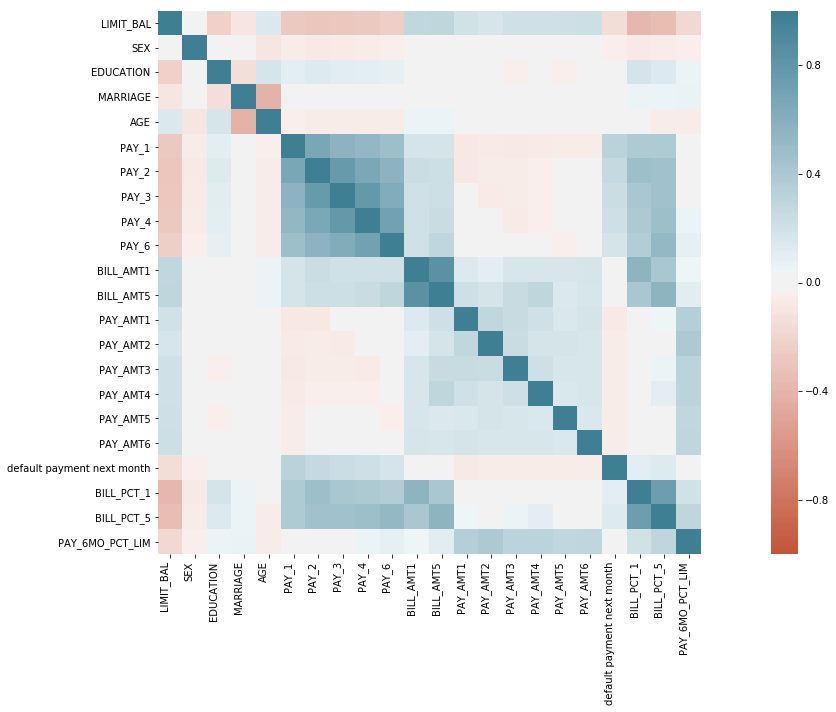

In [50]:
#Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
    
data=cr
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1',
        'BILL_PCT_5',  'PAY_6MO_PCT_LIM',  'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK']
corr = data[columns].corr()

plt.figure(figsize = (25,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')
    

In [51]:
#Source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
data=cr
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1',
        'BILL_PCT_5',  'PAY_6MO_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK']
corr2 = data[columns].corr()

corr2.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_PCT_1,BILL_PCT_5,PAY_6MO_PCT_LIM
LIMIT_BAL,1,0.025,-0.22,-0.11,0.14,-0.27,-0.3,-0.29,-0.27,-0.24,0.29,0.3,0.2,0.18,0.21,0.2,0.22,0.22,-0.15,-0.37,-0.34,-0.18
SEX,0.025,1,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.06,-0.044,-0.034,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.04,-0.077,-0.052,-0.039
EDUCATION,-0.22,0.014,1,-0.14,0.18,0.11,0.12,0.11,0.11,0.082,0.024,-0.0076,-0.037,-0.03,-0.04,-0.038,-0.04,-0.037,0.028,0.18,0.13,0.053
MARRIAGE,-0.11,-0.031,-0.14,1,-0.41,0.02,0.024,0.033,0.033,0.034,-0.023,-0.025,-0.006,-0.0081,-0.0035,-0.013,-0.0012,-0.0066,-0.024,0.048,0.048,0.064
AGE,0.14,-0.091,0.18,-0.41,1,-0.039,-0.05,-0.053,-0.05,-0.049,0.056,0.049,0.026,0.022,0.029,0.021,0.023,0.019,0.014,-0.027,-0.05,-0.049
PAY_1,-0.27,-0.058,0.11,0.02,-0.039,1,0.67,0.57,0.54,0.47,0.19,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.32,0.38,0.38,-0.012
PAY_2,-0.3,-0.071,0.12,0.024,-0.05,0.67,1,0.77,0.66,0.58,0.23,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.26,0.47,0.46,0.016
PAY_3,-0.29,-0.066,0.11,0.033,-0.053,0.57,0.77,1,0.78,0.63,0.21,0.23,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24,0.42,0.46,0.039
PAY_4,-0.27,-0.06,0.11,0.033,-0.05,0.54,0.66,0.78,1,0.72,0.2,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.22,0.39,0.47,0.058
PAY_6,-0.24,-0.044,0.082,0.034,-0.049,0.47,0.58,0.63,0.72,1,0.21,0.29,-0.0015,-0.0052,0.0058,0.019,-0.046,-0.025,0.19,0.36,0.52,0.081


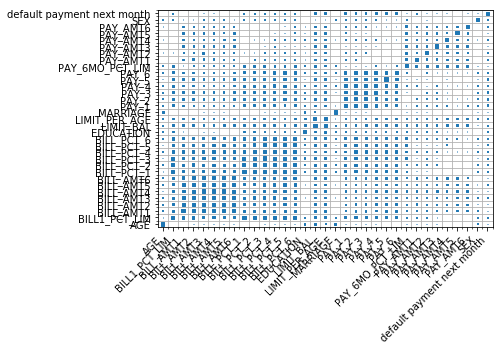

In [52]:
# Credit/Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec


def heatmap(x,y,size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 10
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)  
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
   
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    
data=cr
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK']
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)



## COVARIANCE

In [53]:
covMat = cr.cov()
print(covMat.iloc[0:33])

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_1                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

In [54]:
data=cr
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1',
        'BILL_PCT_5',  'PAY_6MO_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK']
cov2 = data[columns].cov()

cov2.style.background_gradient(cmap="coolwarm").set_precision(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_PCT_1,BILL_PCT_5,PAY_6MO_PCT_LIM
LIMIT_BAL,1.7e+10,1.6e+03,-2.2e+04,-7.3e+03,1.7e+05,-4e+04,-4.6e+04,-4.4e+04,-4.1e+04,-3.5e+04,2.7e+09,2.3e+09,4.2e+08,5.3e+08,4.8e+08,4.1e+08,4.3e+08,5.1e+08,-8.3e+03,-2e+04,-1.5e+04,-7.5e+03
SEX,1.6e+03,0.24,0.0055,-0.008,-0.41,-0.032,-0.041,-0.039,-0.034,-0.025,-1.2e+03,-5.1e+02,-2,-16,-74,-17,-12,-24,-0.0081,-0.016,-0.009,-0.006
EDUCATION,-2.2e+04,0.0055,0.62,-0.059,1.3,0.094,0.12,0.11,0.1,0.075,1.4e+03,-3.6e+02,-4.9e+02,-5.5e+02,-5.6e+02,-4.7e+02,-4.9e+02,-5.2e+02,0.0092,0.06,0.037,0.013
MARRIAGE,-7.3e+03,-0.008,-0.059,0.27,-2,0.012,0.015,0.02,0.02,0.021,-9e+02,-8.1e+02,-52,-97,-33,-1e+02,-9.6,-62,-0.0053,0.01,0.0088,0.01
AGE,1.7e+05,-0.41,1.3,-2,85,-0.41,-0.55,-0.59,-0.54,-0.52,3.8e+04,2.8e+04,4e+03,4.6e+03,4.7e+03,3.1e+03,3.2e+03,3.2e+03,0.053,-0.1,-0.16,-0.14
PAY_1,-4e+04,-0.032,0.094,0.012,-0.41,1.3,0.9,0.77,0.71,0.61,1.5e+04,1.2e+04,-1.5e+03,-1.8e+03,-1.4e+03,-1.1e+03,-1e+03,-1.2e+03,0.15,0.18,0.15,-0.0043
PAY_2,-4.6e+04,-0.041,0.12,0.015,-0.55,0.9,1.4,1.1,0.93,0.79,2.1e+04,1.6e+04,-1.6e+03,-1.6e+03,-1.2e+03,-8.8e+02,-6.8e+02,-7.8e+02,0.13,0.23,0.19,0.0062
PAY_3,-4.4e+04,-0.039,0.11,0.02,-0.59,0.77,1.1,1.4,1.1,0.87,1.8e+04,1.6e+04,26,-1.8e+03,-1.1e+03,-8.6e+02,-6.6e+02,-7.6e+02,0.12,0.21,0.19,0.015
PAY_4,-4.1e+04,-0.034,0.1,0.02,-0.54,0.71,0.93,1.1,1.4,0.96,1.7e+04,1.7e+04,-1.8e+02,-52,-1.4e+03,-8e+02,-6e+02,-5.5e+02,0.11,0.19,0.19,0.021
PAY_6,-3.5e+04,-0.025,0.075,0.021,-0.52,0.61,0.79,0.87,0.96,1.3,1.8e+04,2e+04,-29,-1.4e+02,1.2e+02,3.4e+02,-8.2e+02,-5.2e+02,0.089,0.17,0.21,0.03


### Analysis
* Negative covariance with Default: LIMIT_BAL, BILL_AMT1, BILL_AMT5, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6.
* No significant positive covariance


## Exploration

* Looking at defaults
    - is there a pattern (Age, Marriage, Sex, Education)
    - is there a pattern in payment history?
    - is there a pattern in bill amount
    

In [55]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6              

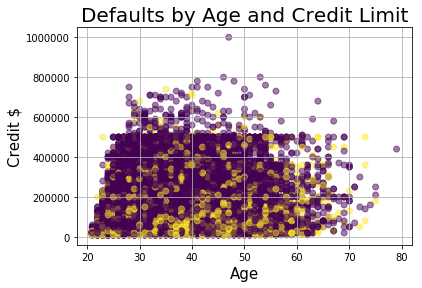

In [56]:
x = cr['AGE']
y = cr['LIMIT_BAL']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Credit $", fontsize = 15)
ax.set_title("Defaults by Age and Credit Limit", fontsize = 20)

ax.grid(True)
plt.show()

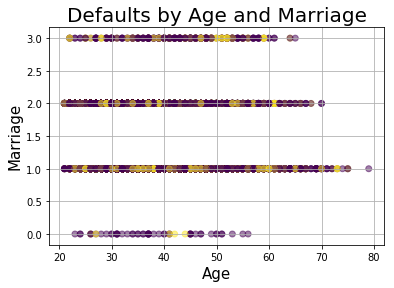

In [57]:
x = cr['AGE']
y = cr['MARRIAGE']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Marriage", fontsize = 15)
ax.set_title("Defaults by Age and Marriage", fontsize = 20)

ax.grid(True)
plt.show()

In [58]:
crd = cr[cr['default payment next month']==1]

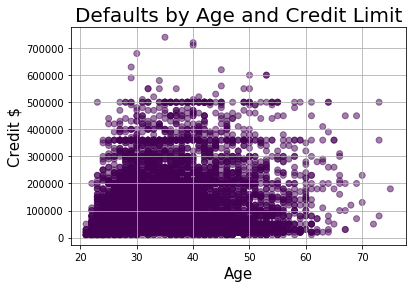

In [59]:
x = crd['AGE']
y = crd['LIMIT_BAL']
default = crd['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Credit $", fontsize = 15)
ax.set_title("Defaults by Age and Credit Limit", fontsize = 20)

ax.grid(True)
plt.show()

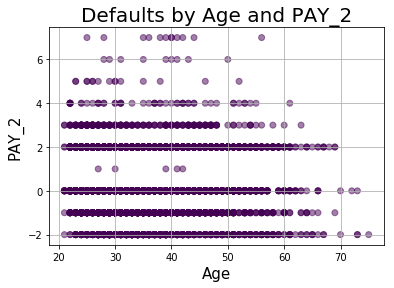

In [60]:
x = crd['AGE']
y = crd['PAY_2']
default = crd['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("PAY_2", fontsize = 15)
ax.set_title("Defaults by Age and PAY_2", fontsize = 20)

ax.grid(True)
plt.show()

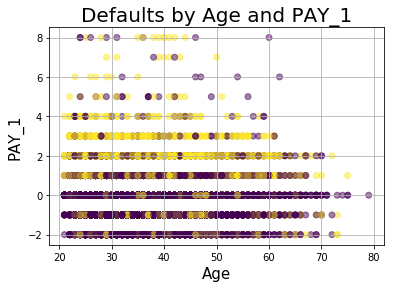

In [61]:
x = cr['AGE']
y = cr['PAY_1']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("PAY_1", fontsize = 15)
ax.set_title("Defaults by Age and PAY_1", fontsize = 20)

ax.grid(True)
plt.show()

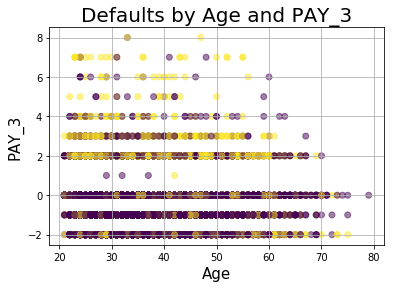

In [62]:
x = cr['AGE']
y = cr['PAY_3']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("PAY_3", fontsize = 15)
ax.set_title("Defaults by Age and PAY_3", fontsize = 20)

ax.grid(True)
plt.show()

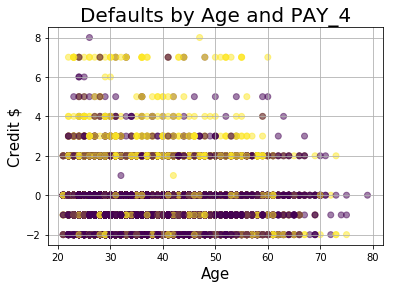

In [63]:
x = cr['AGE']
y = cr['PAY_4']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Credit $", fontsize = 15)
ax.set_title("Defaults by Age and PAY_4", fontsize = 20)

ax.grid(True)
plt.show()

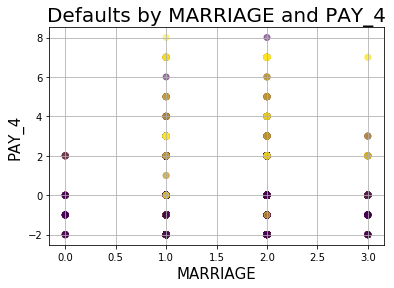

In [64]:
x = cr['MARRIAGE']
y = cr['PAY_4']
default = cr['default payment next month']

fig, ax = plt.subplots()
ax.scatter(x, y, c=default,alpha = .5)
ax.set_xlabel("MARRIAGE", fontsize = 15)
ax.set_ylabel("PAY_4", fontsize = 15)
ax.set_title("Defaults by MARRIAGE and PAY_4", fontsize = 20)

ax.grid(True)
plt.show()

In [65]:
crd.pivot_table("def_word","SEX_BUCK","MAR_BUCK", aggfunc = len, margins=True)

MAR_BUCK,DIV,MARR,OTHR,SING,All
SEX_BUCK,,,,,
FEML,44,1860,3,1856,3763
MALE,40,1346,2,1485,2873
All,84,3206,5,3341,6636


In [66]:
cr.pivot_table("default payment next month","SEX","AGE", aggfunc = np.sum, margins=True)

AGE,21,22,23,24,25,26,27,28,29,30,...,68,69,70,71,72,73,74,75,79,All
SEX,,,,,,,,,,,,,,,,,,,,,
1,5.0,48.0,74.0,105.0,109.0,103.0,112.0,105.0,128.0,124.0,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,0.0,2873
2,9.0,121.0,173.0,195.0,193.0,150.0,201.0,181.0,185.0,150.0,...,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,NaN,3763
All,14.0,169.0,247.0,300.0,302.0,253.0,313.0,286.0,313.0,274.0,...,1.0,3.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,6636


In [67]:
len(crd)

6636

In [68]:
crd.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK'],
      dtype='object')

In [69]:
crd.pivot_table("default payment next month","SEX","LIMIT_BAL_BUCK", aggfunc = len, margins=True)

LIMIT_BAL_BUCK,300K+,<100K,<200K,<300K,<50K,All
SEX,,,,,,
1,302,766,635,402,768,2873
2,398,1091,902,585,787,3763
All,700,1857,1537,987,1555,6636


In [70]:
table = cr.pivot_table("default payment next month","LIMIT_BAL_BUCK","def_word", aggfunc = len, margins=True)
table["DEF_Rate"] = (table.DEFAULT/(table.DEFAULT+table.PAID))

print(table)

def_word        DEFAULT   PAID    All  DEF_Rate
LIMIT_BAL_BUCK                                 
300K+               700   4417   5117  0.136799
<100K              1857   5282   7139  0.260120
<200K              1537   5863   7400  0.207703
<300K               987   5046   6033  0.163600
<50K               1555   2756   4311  0.360705
All                6636  23364  30000  0.221200


### ANALYSIS: Default rates are higher than average for customers with a Credit Limit under 100k (especially under 50k)

In [71]:
table = cr.pivot_table("default payment next month","MAR_BUCK","def_word", aggfunc = len, margins=True)
table["DEF_Rate"] = (table.DEFAULT/(table.DEFAULT+table.PAID))

print(table)

def_word  DEFAULT   PAID    All  DEF_Rate
MAR_BUCK                                 
DIV            84    239    323  0.260062
MARR         3206  10453  13659  0.234717
OTHR            5     49     54  0.092593
SING         3341  12623  15964  0.209283
All          6636  23364  30000  0.221200


### ANALYSIS: Married and divorced borrowers have a higher rate of default.

In [72]:
table = cr.pivot_table("default payment next month","SEX","def_word", aggfunc = len, margins=True)
table["DEF_Rate"] = (table.DEFAULT/(table.DEFAULT+table.PAID))

print(table)

def_word  DEFAULT   PAID    All  DEF_Rate
SEX                                      
1            2873   9015  11888  0.241672
2            3763  14349  18112  0.207763
All          6636  23364  30000  0.221200


### ANALYSIS: Male borrowers are more likely to default

In [73]:
table = cr.pivot_table("default payment next month","AGE_BUCK","def_word", aggfunc = len, margins=True)
table["DEF_Rate"] = (table.DEFAULT/(table.DEFAULT+table.PAID))

print(table)

def_word  DEFAULT   PAID    All  DEF_Rate
AGE_BUCK                                 
50+           678   2002   2680  0.252985
<25           730   1955   2685  0.271881
<30          1467   5466   6933  0.211597
<35          1174   4904   6078  0.193156
<40          1102   4058   5160  0.213566
<50          1485   4979   6464  0.229734
All          6636  23364  30000  0.221200


### ANALYSIS: Customers under between 30 and 35 have the lowest default rate. 25-30 and 35-40 also have lower than average rates. Under 25 and 40+ have higher default rates.

In [74]:
table = pd.crosstab(index=[cr.AGE_BUCK], columns=[ cr.def_word,cr.SEX_BUCK], 
                    margins=True, margins_name="Subtotal")
table

def_word DEFAULT         PAID       Subtotal
SEX_BUCK    FEML  MALE   FEML  MALE         
AGE_BUCK                                    
50+          335   343   1074   928     2680
<25          498   232   1412   543     2685
<30          910   557   3517  1949     6933
<35          650   524   2994  1910     6078
<40          576   526   2453  1605     5160
<50          794   691   2899  2080     6464
Subtotal    3763  2873  14349  9015    30000

In [75]:
table2 = pd.crosstab(index=[cr.AGE_BUCK], columns=[ cr.def_word,cr.SEX_BUCK], normalize="index")
table2

def_word   DEFAULT                PAID          
SEX_BUCK      FEML      MALE      FEML      MALE
AGE_BUCK                                        
50+       0.125000  0.127985  0.400746  0.346269
<25       0.185475  0.086406  0.525885  0.202235
<30       0.131256  0.080340  0.507284  0.281119
<35       0.106943  0.086213  0.492596  0.314248
<40       0.111628  0.101938  0.475388  0.311047
<50       0.122834  0.106900  0.448484  0.321782

In [76]:
table = pd.crosstab(index=[cr.def_word], columns=[cr.AGE_BUCK,cr.SEX_BUCK]).unstack().reset_index().rename(columns={0: "Count"})

table

,AGE_BUCK,SEX_BUCK,def_word,Count
0,50+,FEML,DEFAULT,335
1,50+,FEML,PAID,1074
2,50+,MALE,DEFAULT,343
3,50+,MALE,PAID,928
4,<25,FEML,DEFAULT,498
5,<25,FEML,PAID,1412
6,<25,MALE,DEFAULT,232
7,<25,MALE,PAID,543
8,<30,FEML,DEFAULT,910
9,<30,FEML,PAID,3517


In [77]:
table = pd.crosstab(index=[cr.def_word], columns=[cr.AGE_BUCK,cr.SEX_BUCK]).unstack().reset_index().rename(columns={0: "Count"})
xt = table.pivot_table("Count",["SEX_BUCK","AGE_BUCK"],"def_word", aggfunc = sum, margins=True)

xt

def_word           DEFAULT   PAID    All
SEX_BUCK AGE_BUCK                       
FEML     50+           335   1074   1409
         <25           498   1412   1910
         <30           910   3517   4427
         <35           650   2994   3644
         <40           576   2453   3029
         <50           794   2899   3693
MALE     50+           343    928   1271
         <25           232    543    775
         <30           557   1949   2506
         <35           524   1910   2434
         <40           526   1605   2131
         <50           691   2080   2771
All                   6636  23364  30000

### Found much simpler way to do it...

In [79]:
xt2= cr.pivot_table("default payment next month",["AGE_BUCK","MAR_BUCK","SEX_BUCK","EDU_BUCK"],"def_word", aggfunc = len, margins=True)
xt2["AGE-MAR-SEX-EDU_DEF_Rate"] = (xt2.DEFAULT/(xt2.All))
xt2["PCT"] = (xt2.All/30000)
xt2

def_word                             DEFAULT     PAID    All  \
AGE_BUCK MAR_BUCK SEX_BUCK EDU_BUCK                            
50+      DIV      FEML     GRAD          NaN      3.0      3   
                           HS           10.0     13.0     23   
                           UNIV          5.0     14.0     19   
                  MALE     GRAD          4.0      5.0      9   
                           HS            5.0     10.0     15   
                           UNIV          2.0      7.0      9   
         MARR     FEML     GRAD         41.0    155.0    196   
                           HS          109.0    324.0    433   
                           OTHR          NaN     20.0     20   
                           UNIV        102.0    277.0    379   
                  MALE     GRAD         80.0    237.0    317   
                           HS           93.0    217.0    310   
                           OTHR          3.0     12.0     15   
                           UNIV        104.0    235.0    339   
         OTHR     FEML     HS            NaN      4.0      4   
                  MALE     HS            NaN      3.0      3   
         SING     FEML     GRAD         12.0     49.0     61   
                           HS           34.0    115.0    149   
                           OTHR          NaN      6.0      6   
                           UNIV         22.0     94.0    116   
                  MALE     GRAD         11.0     47.0     58   
                           HS           18.0     75.0     93   
                           OTHR          1.0      3.0      4   
                           UNIV         22.0     77.0     99   
<25      DIV      FEML     GRAD          2.0      NaN      2   
                           HS            NaN      1.0      1   
                           UNIV          NaN      4.0      4   
                  MALE     HS            1.0      1.0      2   
                           UNIV          NaN      1.0      1   
         MARR     FEML     GRAD          6.0     15.0     21   
...                                      ...      ...    ...   
<40      SING     MALE     UNIV        107.0    288.0    395   
<50      DIV      FEML     GRAD          NaN      6.0      6   
                           HS            4.0     28.0     32   
                           OTHR          NaN      3.0      3   
                           UNIV         10.0     26.0     36   
                  MALE     GRAD          4.0      8.0     12   
                           HS            5.0     13.0     18   
                           OTHR          NaN      1.0      1   
                           UNIV         11.0     16.0     27   
         MARR     FEML     GRAD        113.0    513.0    626   
                           HS          176.0    512.0    688   
                           OTHR          4.0     40.0     44   
                           UNIV        291.0   1040.0   1331   
                  MALE     GRAD        156.0    537.0    693   
                           HS          110.0    304.0    414   
                           OTHR          5.0     27.0     32   
                           UNIV        222.0    602.0    824   
         OTHR     FEML     GRAD          NaN      1.0      1   
                           HS            2.0      8.0     10   
                           UNIV          1.0      1.0      2   
                  MALE     HS            NaN      2.0      2   
         SING     FEML     GRAD         49.0    198.0    247   
                           HS           58.0    177.0    235   
                           OTHR          5.0     20.0     25   
                           UNIV         81.0    326.0    407   
                  MALE     GRAD         41.0    160.0    201   
                           HS           47.0    150.0    197   
                           OTHR          NaN     16.0     16   
                           UNIV         90.0    244.0    334   
All                             

### ANALYSIS - Key factors mentioned above play in here:
* Dataset default rate is 22.12%
* Women make up a larger percentage of loans, but have a lower default rate than men.
* Married and divorced clients have a higher likelihood of default.
* Younger customers (especially under 25) have a higher risk of default
* Older clients (50+) have a higher default rate, but Credit One’s number of loans is fairly low.
* Graduate and University educated clients tend to have lower default rates


In [82]:
xt3= cr.pivot_table("default payment next month",["AGE_BUCK","SEX_BUCK"],"def_word", aggfunc = len)
xt3["AGE-SEX_DEF_Rate"] = (xt3.DEFAULT/(xt3.DEFAULT+xt3.PAID))
xt3["DEF_Rate"] = (xt3.DEFAULT/30000)
xt3

def_word           DEFAULT  PAID  AGE-SEX_DEF_Rate  DEF_Rate
AGE_BUCK SEX_BUCK                                           
50+      FEML          335  1074          0.237757  0.011167
         MALE          343   928          0.269866  0.011433
<25      FEML          498  1412          0.260733  0.016600
         MALE          232   543          0.299355  0.007733
<30      FEML          910  3517          0.205557  0.030333
         MALE          557  1949          0.222267  0.018567
<35      FEML          650  2994          0.178375  0.021667
         MALE          524  1910          0.215283  0.017467
<40      FEML          576  2453          0.190162  0.019200
         MALE          526  1605          0.246832  0.017533
<50      FEML          794  2899          0.215001  0.026467
         MALE          691  2080          0.249368  0.023033

Text(0, 0.5, 'Count of Loans by Age Bucket and Sex')

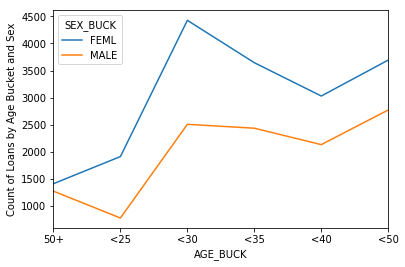

In [85]:
cr.pivot_table('default payment next month', index='AGE_BUCK', columns='SEX_BUCK', aggfunc=len).plot()
plt.ylabel('Count of Loans by Age Bucket and Sex')

### ANALYSIS - More loans are issued to females. 

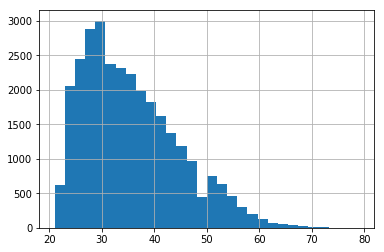

In [210]:
#Distribution of Age
cr['AGE'].hist(bins=30)

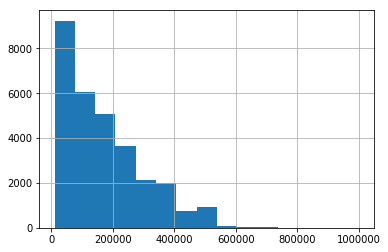

In [211]:
#Distribution of Credit Limit
cr['LIMIT_BAL'].hist(bins=15)

In [94]:
cr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_PCT_1', 'BILL_PCT_2', 'BILL_PCT_3',
       'BILL_PCT_4', 'BILL_PCT_5', 'BILL_PCT_6', 'PAY_6MO_PCT_LIM',
       'LIMIT_PER_AGE', 'BILL1_PCT_LIM', 'EDU_BUCK', 'SEX_BUCK', 'MAR_BUCK',
       'def_word', 'AGE_BUCK', 'LIMIT_BAL_BUCK'],
      dtype='object')

In [95]:
table = cr.pivot_table("default payment next month","AGE","def_word", aggfunc = len, margins=True)
table["DEF_Rate"] = (table.DEFAULT/(table.DEFAULT+table.PAID))

print(table)

def_word  DEFAULT     PAID    All  DEF_Rate
AGE                                        
21           14.0     53.0     67  0.208955
22          169.0    391.0    560  0.301786
23          247.0    684.0    931  0.265306
24          300.0    827.0   1127  0.266193
25          302.0    884.0   1186  0.254637
26          253.0   1003.0   1256  0.201433
27          313.0   1164.0   1477  0.211916
28          286.0   1123.0   1409  0.202981
29          313.0   1292.0   1605  0.195016
30          274.0   1121.0   1395  0.196416
31          229.0    988.0   1217  0.188168
32          225.0    933.0   1158  0.194301
33          215.0    931.0   1146  0.187609
34          231.0    931.0   1162  0.198795
35          226.0    887.0   1113  0.203055
36          254.0    854.0   1108  0.229242
37          229.0    812.0   1041  0.219981
38          194.0    750.0    944  0.205508
39          199.0    755.0    954  0.208595
40          187.0    683.0    870  0.214943
41          185.0    639.0    82

In [93]:
table = cr.pivot_table(["PAY_6","PAY_5","PAY_4","PAY_3","PAY_2","PAY_1"],"def_word","SEX_BUCK", aggfunc = np.average)

print(table)

             PAY_1               PAY_2               PAY_3            \
SEX_BUCK      FEML      MALE      FEML      MALE      FEML      MALE   
def_word                                                               
DEFAULT   0.619984  0.731291  0.385331  0.553777  0.272921  0.478942   
PAID     -0.249913 -0.149639 -0.356541 -0.214975 -0.362255 -0.243039   

             PAY_4               PAY_5               PAY_6            
SEX_BUCK      FEML      MALE      FEML      MALE      FEML      MALE  
def_word                                                              
DEFAULT   0.181238  0.350505  0.093011  0.265924  0.051289  0.191786  
PAID     -0.398007 -0.288186 -0.424211 -0.334221 -0.432643 -0.362618  


### ANALYSIS
In aggregate, the customers who default exhibit a different PAY pattern than those who do not default. We see a higher default rate (and slightly poorer scores on non-defaults) for men compared to women. A customer who is behind in prior months is more likely to be in default in the dataset.